## Final Project Submission

Please fill out:
* Student name: Sylvia Murithi
* Student pace: part time
* Scheduled project review date/time: 23rd July 2023
* Instructor name: Maryanne Mwikali
* Blog post URL:https://github.com/Swem-wanja/dsc-phase-1-project.git


The aim of this project is to see what genres are doing the best in terms of revenue and what is most liked.
We will start off by importing all the necessary libraries and uploading the data we will be working with.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Movies_gross_rating.csv')

In [3]:
df.head()

,index,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count
0,0,1,Look Who's Talking,PG-13,7500000,296000000,12/10/1989,Romance,93,5.9,73638.0
1,1,2,Driving Miss Daisy,PG,7500000,145793296,13/12/1989,Comedy,99,7.4,91075.0
2,2,3,Turner & Hooch,PG,13000000,71079915,28/07/1989,Crime,100,7.2,91415.0
3,3,4,Born on the Fourth of July,R,14000000,161001698,20/12/1989,War,145,7.2,91415.0
4,4,5,Field of Dreams,PG,15000000,84431625,21/04/1989,Drama,107,7.5,101702.0


In [4]:
df.describe()

,index,MovieID,Budget,Gross,Runtime,Rating,Rating Count
count,510.000000,510.000000,5.100000e+02,5.100000e+02,510.000000,508.000000,5.080000e+02
mean,254.500000,255.500000,8.429905e+07,3.831987e+08,117.758824,6.917323,3.392521e+05
std,147.368586,147.368586,5.995296e+07,2.775539e+08,22.678644,0.888928,3.213388e+05
min,0.000000,1.000000,6.000000e+04,5.300000e+07,79.000000,4.100000,1.491800e+04
25%,127.250000,128.250000,3.557500e+07,1.965040e+08,100.000000,6.400000,1.275922e+05
50%,254.500000,255.500000,7.050000e+07,3.100716e+08,115.000000,6.900000,2.403475e+05
75%,381.750000,382.750000,1.250000e+08,4.826054e+08,130.000000,7.600000,4.257000e+05
max,509.000000,510.000000,3.800000e+08,2.787965e+09,201.000000,9.000000,2.127228e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         510 non-null    int64  
 1   MovieID       510 non-null    int64  
 2   Title         510 non-null    object 
 3   MPAA Rating   510 non-null    object 
 4   Budget        510 non-null    int64  
 5   Gross         510 non-null    int64  
 6   Release Date  510 non-null    object 
 7   Genre         510 non-null    object 
 8   Runtime       510 non-null    int64  
 9   Rating        508 non-null    float64
 10  Rating Count  508 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 44.0+ KB


In [6]:
#We are going to check the empty rows then drop them.
df[df.isnull().any(axis=1)]

,index,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count
486,486,487,Fast & Furious 6,PG-13,160000000,788679850,06/05/2013,Action,130,NaN,NaN
489,489,490,Oz: The Great and Powerful,PG,200000000,491868548,07/03/2013,Drama,130,NaN,NaN


In [7]:
df.dropna()

,index,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count
0,0,1,Look Who's Talking,PG-13,7500000,296000000,12/10/1989,Romance,93,5.9,73638.0
1,1,2,Driving Miss Daisy,PG,7500000,145793296,13/12/1989,Comedy,99,7.4,91075.0
2,2,3,Turner & Hooch,PG,13000000,71079915,28/07/1989,Crime,100,7.2,91415.0
3,3,4,Born on the Fourth of July,R,14000000,161001698,20/12/1989,War,145,7.2,91415.0
4,4,5,Field of Dreams,PG,15000000,84431625,21/04/1989,Drama,107,7.5,101702.0
...,...,...,...,...,...,...,...,...,...,...,...
505,505,506,Big Hero 6,PG,165000000,652105443,24/10/2014,Animation,102,7.8,380953.0
506,506,507,Interstellar,PG-13,165000000,675120017,05/11/2014,Science Fiction,169,8.6,1343549.0
507,507,508,Captain America: The Winter Soldier,PG-13,170000000,714766572,20/03/2014,Action,136,7.7,685903.0
508,508,509,Dawn of the Planet of the Apes,PG-13,170000000,710644566,26/06/2014,Science Fiction,130,7.6,395425.0


In [8]:
#Checking the number of times each genre appears.
df['Genre'].value_counts()

Comedy             94
Action             77
Animation          63
Drama              57
Thriller           34
Science Fiction    31
Family             28
Adventure          26
Romance            26
Fantasy            22
Crime              16
Mystery            10
Horror              9
War                 8
Western             5
History             4
Name: Genre, dtype: int64

In [9]:
genre_ratings = df.groupby('Genre')['Rating'].mean()
genre_ratings

Genre
Action             7.023684
Adventure          6.665385
Animation          7.190476
Comedy             6.617021
Crime              6.875000
Drama              7.246429
Family             6.089286
Fantasy            7.436364
History            7.625000
Horror             6.644444
Mystery            6.820000
Romance            6.361538
Science Fiction    7.200000
Thriller           7.014706
War                7.412500
Western            7.420000
Name: Rating, dtype: float64

In [10]:
sorted_genres = genre_ratings.sort_values(ascending=False)
sorted_genres

Genre
History            7.625000
Fantasy            7.436364
Western            7.420000
War                7.412500
Drama              7.246429
Science Fiction    7.200000
Animation          7.190476
Action             7.023684
Thriller           7.014706
Crime              6.875000
Mystery            6.820000
Adventure          6.665385
Horror             6.644444
Comedy             6.617021
Romance            6.361538
Family             6.089286
Name: Rating, dtype: float64

In [11]:
genre_count = df.groupby('Genre')['Rating Count'].mean()
genre_count

Genre
Action             477202.539474
Adventure          399555.076923
Animation          325150.920635
Comedy             220524.127660
Crime              223550.250000
Drama              291762.785714
Family             153538.357143
Fantasy            602313.954545
History            448652.000000
Horror             207496.222222
Mystery            288529.200000
Romance            205984.269231
Science Fiction    493352.290323
Thriller           419500.029412
War                411161.000000
Western            451161.600000
Name: Rating Count, dtype: float64

In [12]:
genre_count.sort_values(ascending=False)

Genre
Fantasy            602313.954545
Science Fiction    493352.290323
Action             477202.539474
Western            451161.600000
History            448652.000000
Thriller           419500.029412
War                411161.000000
Adventure          399555.076923
Animation          325150.920635
Drama              291762.785714
Mystery            288529.200000
Crime              223550.250000
Comedy             220524.127660
Horror             207496.222222
Romance            205984.269231
Family             153538.357143
Name: Rating Count, dtype: float64

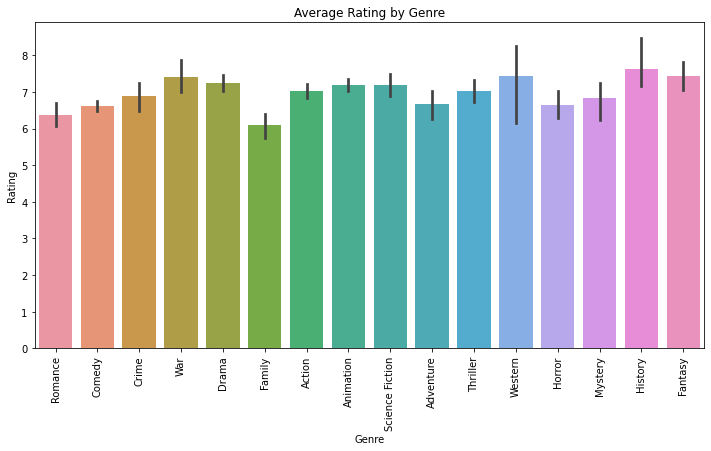

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the relation between 'Genre' and 'Rating' using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Rating', data=df)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Average Rating by Genre')
plt.show()

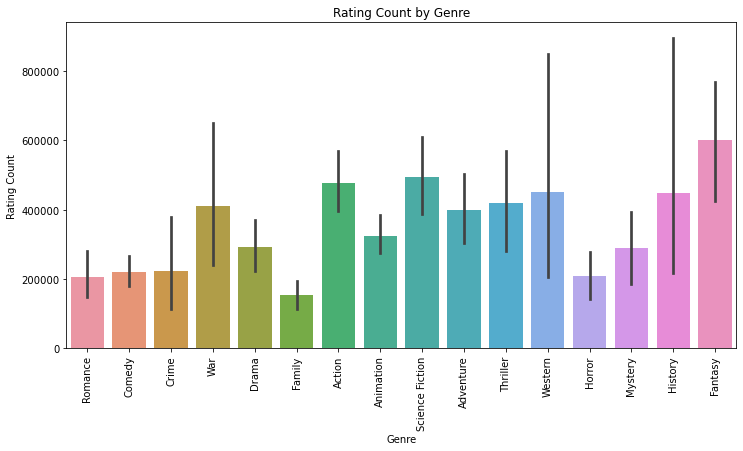

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Rating Count', data=df)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Rating Count')
plt.title('Rating Count by Genre')
plt.show()

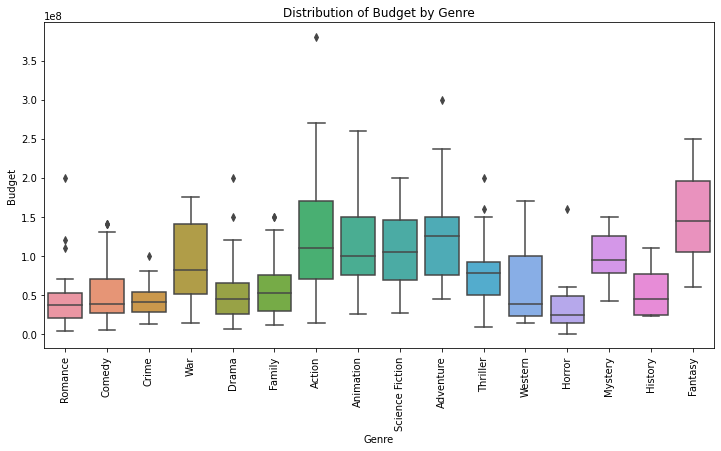

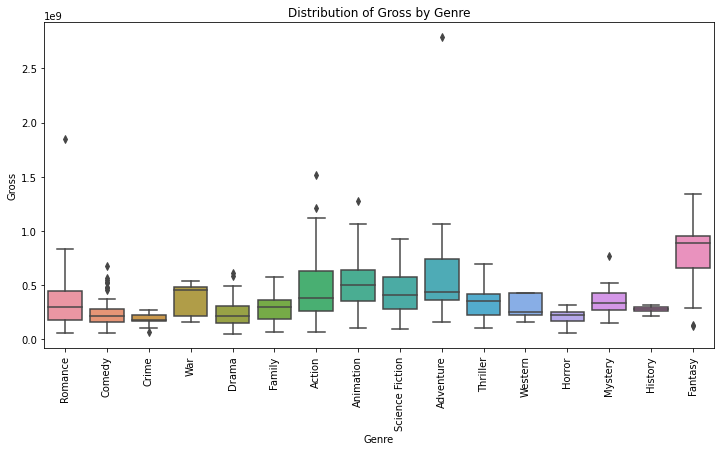

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Budget', data=df)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Distribution of Budget by Genre')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Gross', data=df)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.title('Distribution of Gross by Genre')
plt.show()

In [16]:
average_gross_by_genre = df.groupby('Genre')['Gross'].mean()
average_gross_by_genre

Genre
Action             4.727080e+08
Adventure          6.013784e+08
Animation          5.258052e+08
Comedy             2.330900e+08
Crime              1.879282e+08
Drama              2.369110e+08
Family             2.900095e+08
Fantasy            7.806203e+08
History            2.753178e+08
Horror             2.079729e+08
Mystery            3.666867e+08
Romance            3.878037e+08
Science Fiction    4.390405e+08
Thriller           3.454838e+08
War                3.741882e+08
Western            2.966232e+08
Name: Gross, dtype: float64

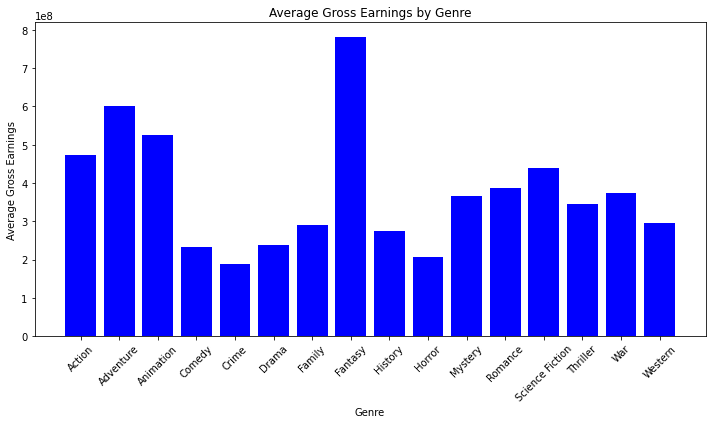

In [17]:
# Create the bar chart for the Gross earning by genre
plt.figure(figsize=(10, 6))
plt.bar(average_gross_by_genre.index, average_gross_by_genre.values, color='b')
plt.xlabel('Genre')
plt.ylabel('Average Gross Earnings')
plt.title('Average Gross Earnings by Genre')
plt.xticks(rotation=45)  # Rotate genre labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

SUMMARY


There is a correlation between the genres and the rating and the number of people rating the movies. The ratings mean is affected by the number of people voting. Few people can vote and give a genre a high rating but it does not mean that a lot of people are watching the movies.
From this I have concluded it is better to review the gross of each genre and the rating count. If more people are watching the movies it means there is a huge crowd for the movies.
Fantasy,Action and Science Fiction are the overlapping genres top five movies based on the gross and rating count.